INDAH CAHYA RESTI - 09011281823046 

# Implementasi ANN dengan BackPropagation
Pada program ini menggunakan dataset tentang Informasi Customer Bank, dimana membuat pembagian apakah customer akan keluar bank atau tidak.
Sumber : https://www.kaggle.com/barelydedicated/intro-to-keras-sklearn-for-detecting-bank-exits/data?select=Churn_Modelling.csv

Backpropagation (Propagasi balik) adalah salah satu dari jaringan saraf tiruan (Neural Network) merupakan metode pelatihan yang terawasi (Supervised Learning) dengan jaringan multi layer dan memiliki ciri khusus meminimalkan error pada output yang dihasilkan oleh jaringan. Biasanya pada proses klasifikasi Backpropagation Neural Network. Classifier ini berkerja dengan cara melakukan dua tahap perhitungan yaiu perhitungan maju yang akan menghitung nlai kesalahan (error) antara nilai output sistem dengan nilai yang seharusnya dan perhitungan mundur untuk memperbaiki bobot berdasarkan nilai error tersebut.

Berikut beberapa rumus perhitungannya :

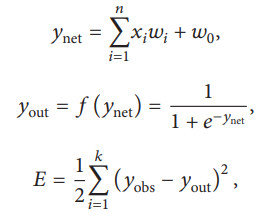

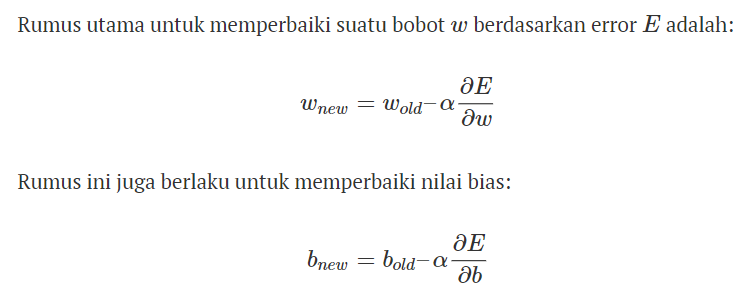



In [1]:
!pip install scikit-learn==0.22.0

You are using pip version 9.0.1, however version 20.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# DATA PROCESSING

In [3]:
# import dataset
dataset = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X_columns = dataset.columns.tolist()[2:12]
y_columns = dataset.columns.tolist()[-1:]
print(f'All columns: {dataset.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


In [5]:
X = dataset[X_columns].values # Credit Score through Estimated Salary
y = dataset[y_columns].values # Exited

In [6]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [7]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


Fitur skala adalah metode yang digunakan untuk membakukan berbagai variabel independen atau fitur data.
Ini pada dasarnya menskalakan semua dimensi agar seimbang sehingga satu variabel independen tidak mendominasi yang lain.
Misalnya, saldo rekening bank berkisar dari jutaan hingga 0, sedangkan jenis kelamin adalah 0 atau 1.
Jika salah satu fitur memiliki rentang nilai yang luas, jarak akan diatur oleh fitur khusus ini.
Oleh karena itu, kisaran semua fitur harus dinormalisasi sehingga setiap fitur dapat memberikan perkiraan secara proporsional dengan jarak akhir.

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [9]:
X = pipeline.fit_transform(X)

In [10]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [11]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


# END OF PROCESSING

In [12]:
# Buat NN

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [13]:
# Initializing the ANN
classifier = Sequential()

unit : 6 nodes (nomor node pada hidden layer.

activiation: relu karena di input layer. Ini menggunakan ReLu activation function untuk layer.
dengan persamaan $max(0, W \times x^T + b)$

input_dim: 11 ,karena berada pada 11 dimensions di input layer. Untuk tambahan layer pertama.


In [14]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

In [15]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1))

activiation: **sigmoid** , karena berada di output layer. menggunakan Sigmoid activation function for $\phi$.
Menggunakan ReLu function untuk menghasilkan kemungkinan orang yang keluar-masuk
kita ingin memiliki kemungkinan pada tiap customer yang meninggalkan bank

In [16]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [17]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Compiling the Neural Network

In [18]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Fitting the Neural Network
Fitting NN dilakukan untuk training set

In [19]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
 - 3s - loss: 0.6441 - accuracy: 0.6610 - val_loss: 0.5291 - val_accuracy: 0.7862
Epoch 2/200
 - 1s - loss: 0.5174 - accuracy: 0.7856 - val_loss: 0.4785 - val_accuracy: 0.7950
Epoch 3/200
 - 1s - loss: 0.4849 - accuracy: 0.7976 - val_loss: 0.4521 - val_accuracy: 0.8025
Epoch 4/200
 - 1s - loss: 0.4658 - accuracy: 0.8036 - val_loss: 0.4351 - val_accuracy: 0.8087
Epoch 5/200
 - 1s - loss: 0.4551 - accuracy: 0.8114 - val_loss: 0.4212 - val_accuracy: 0.8188
Epoch 6/200
 - 1s - loss: 0.4460 - accuracy: 0.8128 - val_loss: 0.4103 - val_accuracy: 0.8200
Epoch 7/200
 - 1s - loss: 0.4321 - accuracy: 0.8175 - val_loss: 0.4000 - val_accuracy: 0.8238
Epoch 8/200
 - 1s - loss: 0.4194 - accuracy: 0.8265 - val_loss: 0.3881 - val_accuracy: 0.8338
Epoch 9/200
 - 1s - loss: 0.4119 - accuracy: 0.8274 - val_loss: 0.3781 - val_accuracy: 0.8338
Epoch 10/200
 - 1s - loss: 0.3980 - accuracy: 0.8319 - val_loss: 0.3697 - val_accuracy: 0.8388
Epoch 11/200

Epoch 87/200
 - 1s - loss: 0.3606 - accuracy: 0.8503 - val_loss: 0.3284 - val_accuracy: 0.8637
Epoch 88/200
 - 1s - loss: 0.3655 - accuracy: 0.8528 - val_loss: 0.3276 - val_accuracy: 0.8650
Epoch 89/200
 - 1s - loss: 0.3593 - accuracy: 0.8507 - val_loss: 0.3257 - val_accuracy: 0.8712
Epoch 90/200
 - 1s - loss: 0.3644 - accuracy: 0.8503 - val_loss: 0.3271 - val_accuracy: 0.8612
Epoch 91/200
 - 1s - loss: 0.3633 - accuracy: 0.8508 - val_loss: 0.3274 - val_accuracy: 0.8600
Epoch 92/200
 - 1s - loss: 0.3632 - accuracy: 0.8501 - val_loss: 0.3280 - val_accuracy: 0.8637
Epoch 93/200
 - 1s - loss: 0.3637 - accuracy: 0.8514 - val_loss: 0.3283 - val_accuracy: 0.8637
Epoch 94/200
 - 1s - loss: 0.3671 - accuracy: 0.8490 - val_loss: 0.3286 - val_accuracy: 0.8637
Epoch 95/200
 - 1s - loss: 0.3640 - accuracy: 0.8500 - val_loss: 0.3283 - val_accuracy: 0.8625
Epoch 96/200
 - 1s - loss: 0.3627 - accuracy: 0.8501 - val_loss: 0.3277 - val_accuracy: 0.8637
Epoch 97/200
 - 1s - loss: 0.3652 - accuracy: 0.84

Epoch 173/200
 - 1s - loss: 0.3582 - accuracy: 0.8562 - val_loss: 0.3272 - val_accuracy: 0.8612
Epoch 174/200
 - 1s - loss: 0.3580 - accuracy: 0.8578 - val_loss: 0.3285 - val_accuracy: 0.8587
Epoch 175/200
 - 1s - loss: 0.3634 - accuracy: 0.8524 - val_loss: 0.3270 - val_accuracy: 0.8612
Epoch 176/200
 - 1s - loss: 0.3578 - accuracy: 0.8536 - val_loss: 0.3259 - val_accuracy: 0.8650
Epoch 177/200
 - 1s - loss: 0.3598 - accuracy: 0.8517 - val_loss: 0.3263 - val_accuracy: 0.8612
Epoch 178/200
 - 1s - loss: 0.3603 - accuracy: 0.8562 - val_loss: 0.3279 - val_accuracy: 0.8600
Epoch 179/200
 - 1s - loss: 0.3593 - accuracy: 0.8519 - val_loss: 0.3271 - val_accuracy: 0.8612
Epoch 180/200
 - 1s - loss: 0.3621 - accuracy: 0.8533 - val_loss: 0.3278 - val_accuracy: 0.8600
Epoch 181/200
 - 1s - loss: 0.3606 - accuracy: 0.8519 - val_loss: 0.3271 - val_accuracy: 0.8650
Epoch 182/200
 - 1s - loss: 0.3600 - accuracy: 0.8539 - val_loss: 0.3276 - val_accuracy: 0.8612
Epoch 183/200
 - 1s - loss: 0.3630 - acc

# Testing the NN
Memprediksi hasil test set

Output network harus berada di akurasi sekitar 85%
Ini menunjukkan kemungkinan customer keluar yang diberikan oleh testing data.
Dimana tiap row in X_test corresponds untuk a row in Y_test

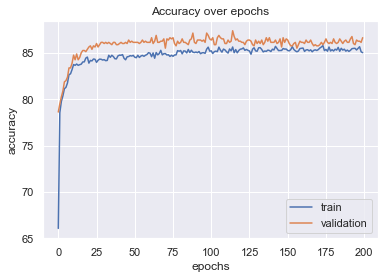

In [20]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [21]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.25444725]
 [0.27671233]
 [0.13083726]
 [0.0739657 ]
 [0.11514324]]


Untuk menggunkan confusion Matrix, kita harus mengubah probabilitas, apakah customer akan keluar termasuk dalam kondisi TRUE atau FALSE.
Jadi, kita potong nilai 0.5 untuk menunjukkan apakah mereka keluar atau tidak.

In [22]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


## Making Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1542   53]
 [ 216  189]]


In [24]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.55 % of testing data was classified correctly
